In [2]:
# Step 1: Load and Preprocess the MNIST Dataset

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [4]:
# Step 2: Define the CNN Architecture

In [5]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

C:\Users\DHRUV KUMAR\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Step 3: Compile the Model

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
# Step 4: Train the Model

In [9]:
history = model.fit(x_train, y_train, batch_size=128, epochs=15, validation_split=0.2)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 25s 56ms/step - accuracy: 0.8445 - loss: 0.5154 - val_accuracy: 0.9803 - val_loss: 0.0693
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 55ms/step - accuracy: 0.9815 - loss: 0.0606 - val_accuracy: 0.9833 - val_loss: 0.0576
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 55ms/step - accuracy: 0.9872 - loss: 0.0404 - val_accuracy: 0.9868 - val_loss: 0.0419
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 54ms/step - accuracy: 0.9914 - loss: 0.0305 - val_accuracy: 0.9883 - val_loss: 0.0360
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 55ms/step - accuracy: 0.9923 - loss: 0.0238 - val_accuracy: 0.9893 - val_loss: 0.0386
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 55ms/step - accuracy: 0.9939 - loss: 0.0195 - val_accuracy: 0.9861 - val_loss: 0.0417
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 56ms/step - accuracy: 0.9953 - loss: 0.0135 - val_accuracy: 0.9898 - val_loss: 0.0353
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - accuracy: 0.9957 - loss: 0.0126 - 

In [10]:
# Step 5: Evaluate the Model

In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9903 - loss: 0.0425
Test Accuracy: 0.9920
Test Loss: 0.0332


In [12]:
# Step 6: Visualize the Results

In [13]:
# Plot Training & Validation Accuracy/Loss

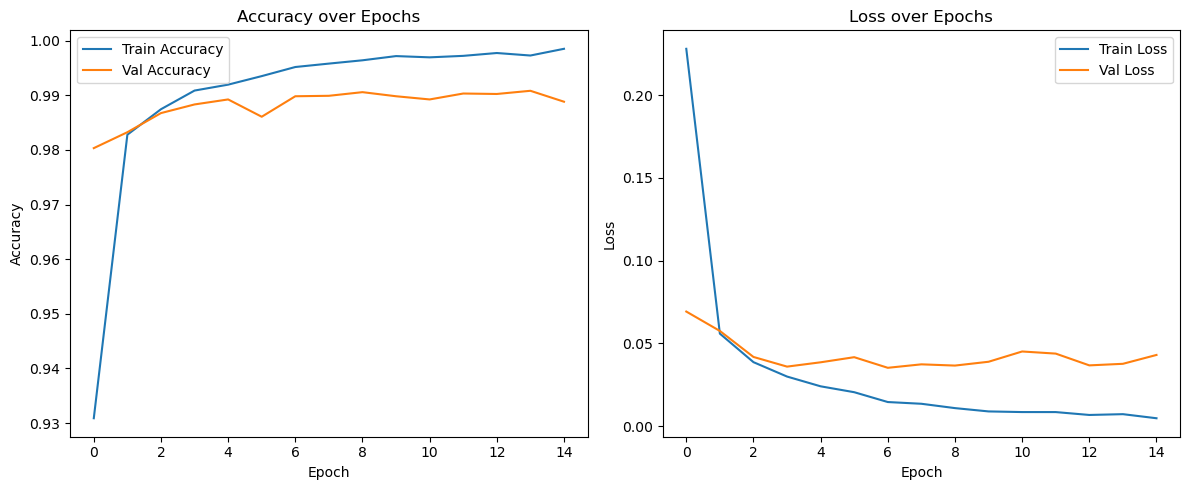

In [14]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

In [15]:
# Display Predictions and Misclassifications

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


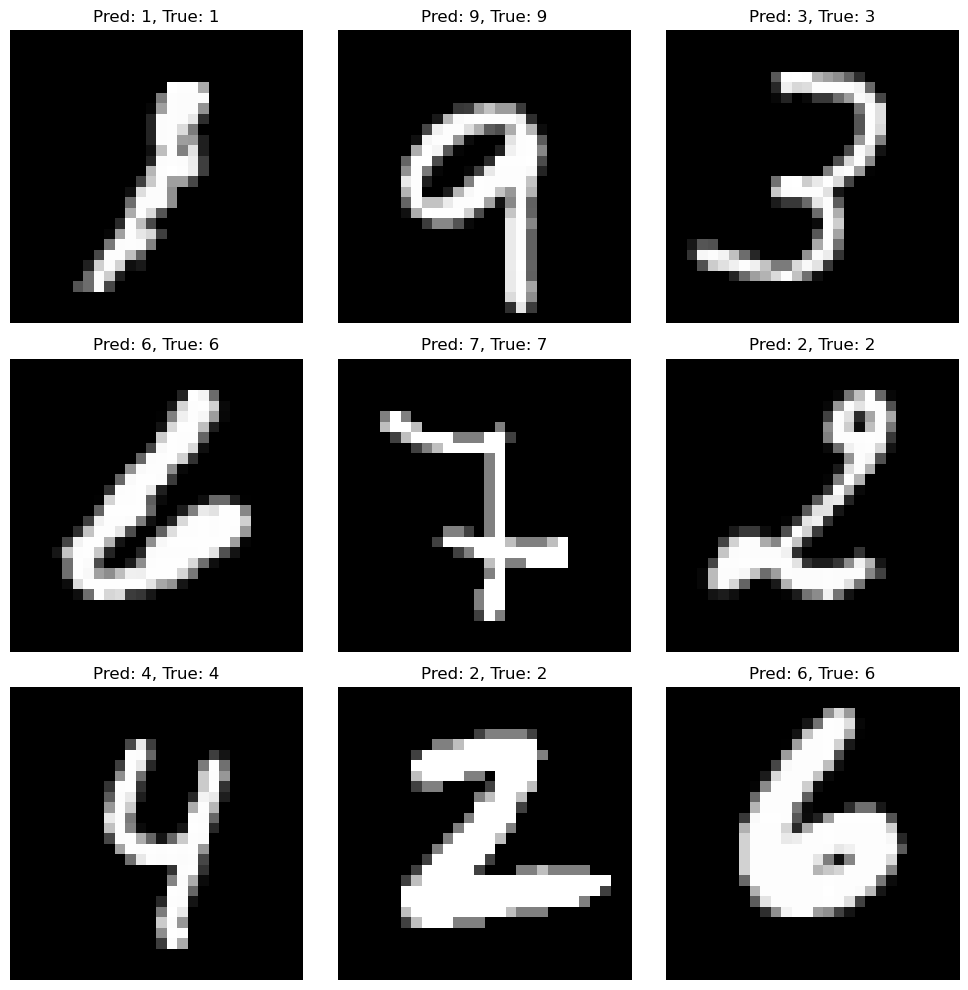

In [16]:
preds = model.predict(x_test)
pred_labels = np.argmax(preds, axis=1)
true_labels = np.argmax(y_test, axis=1)

plt.figure(figsize=(10, 10))
for i in range(9):
    idx = np.random.randint(0, len(x_test))
    plt.subplot(3, 3, i+1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {pred_labels[idx]}, True: {true_labels[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [17]:
# Visualize Filters (Optional Insight)

Filter shape: (3, 3, 1, 32)


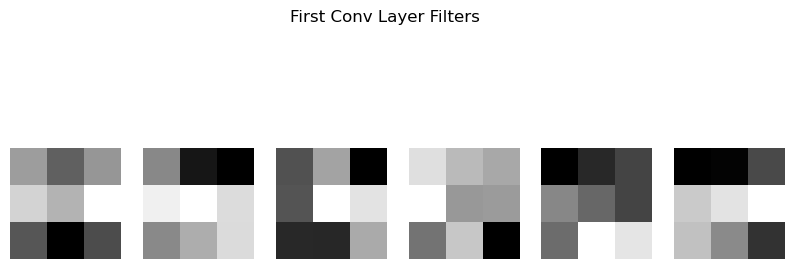

In [18]:
filters, biases = model.layers[0].get_weights()
print(f"Filter shape: {filters.shape}")

plt.figure(figsize=(10, 4))
for i in range(6):
    f = filters[:, :, 0, i]
    plt.subplot(1, 6, i+1)
    plt.imshow(f, cmap='gray')
    plt.axis('off')
plt.suptitle("First Conv Layer Filters")
plt.show()